# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kelo
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | petauke
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | mil'kovo
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | tindouf
Processing Record 11 of Set 1 | mangrol
Processing Record 12 of Set 1 | quellon
Processing Record 13 of Set 1 | esmeraldas
Processing Record 14 of Set 1 | banda aceh
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of 

Processing Record 38 of Set 4 | margate
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | hadibu
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | laayoune plage
City not found. Skipping...
Processing Record 44 of Set 4 | howrah
Processing Record 45 of Set 4 | klyuchi
Processing Record 46 of Set 4 | chengzhong
Processing Record 47 of Set 4 | nar'yan-mar
Processing Record 48 of Set 4 | neryungri
Processing Record 49 of Set 4 | port alfred
Processing Record 0 of Set 5 | arbelaez
Processing Record 1 of Set 5 | summerside
Processing Record 2 of Set 5 | st. john's
Processing Record 3 of Set 5 | ciudad lazaro cardenas
Processing Record 4 of Set 5 | itaituba
Processing Record 5 of Set 5 | kourou
Processing Record 6 of Set 5 | fort bragg
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | tazovsky
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | brisas de zicatela
Proc

Processing Record 27 of Set 8 | komsomol'skiy
Processing Record 28 of Set 8 | uaboe
City not found. Skipping...
Processing Record 29 of Set 8 | piacabucu
Processing Record 30 of Set 8 | chernyshevskiy
Processing Record 31 of Set 8 | cafayate
Processing Record 32 of Set 8 | uliastay
Processing Record 33 of Set 8 | ad dawadimi
Processing Record 34 of Set 8 | cambria
Processing Record 35 of Set 8 | kirakira
Processing Record 36 of Set 8 | bairnsdale
Processing Record 37 of Set 8 | urangan
Processing Record 38 of Set 8 | malango
Processing Record 39 of Set 8 | bandarban
Processing Record 40 of Set 8 | san juan de miraflores
Processing Record 41 of Set 8 | kamloops
Processing Record 42 of Set 8 | madimba
Processing Record 43 of Set 8 | port saint john's
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | happy valley-goose bay
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | branson
Processing Record 48 of Set 8 | qusmuryn
Processing Rec

Processing Record 15 of Set 12 | acapulco de juarez
Processing Record 16 of Set 12 | bouafle
Processing Record 17 of Set 12 | clodomira
Processing Record 18 of Set 12 | cooper's town
Processing Record 19 of Set 12 | coyhaique
Processing Record 20 of Set 12 | mongu
Processing Record 21 of Set 12 | gokwe
Processing Record 22 of Set 12 | labuan
Processing Record 23 of Set 12 | turkmenbasy
Processing Record 24 of Set 12 | tiznit
Processing Record 25 of Set 12 | tayu
Processing Record 26 of Set 12 | dodola
Processing Record 27 of Set 12 | itamaraca
Processing Record 28 of Set 12 | edd
Processing Record 29 of Set 12 | garachico
Processing Record 30 of Set 12 | ohara
Processing Record 31 of Set 12 | ladismith
City not found. Skipping...
Processing Record 32 of Set 12 | saint johns
Processing Record 33 of Set 12 | charters towers
Processing Record 34 of Set 12 | raduzhnyy
Processing Record 35 of Set 12 | bereket
Processing Record 36 of Set 12 | auxerre
Processing Record 37 of Set 12 | ivdel'
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kelo,9.3086,15.8066,25.02,75,58,1.32,TD,1689889126
1,rongelap,11.1635,166.8941,28.68,81,98,8.16,MH,1689889126
2,petauke,-14.2426,31.3253,19.51,46,3,5.48,ZM,1689889126
3,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689888946
4,qaqortoq,60.7167,-46.0333,7.78,98,100,1.21,GL,1689889083


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kelo,9.3086,15.8066,25.02,75,58,1.32,TD,1689889126
1,rongelap,11.1635,166.8941,28.68,81,98,8.16,MH,1689889126
2,petauke,-14.2426,31.3253,19.51,46,3,5.48,ZM,1689889126
3,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689888946
4,qaqortoq,60.7167,-46.0333,7.78,98,100,1.21,GL,1689889083


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

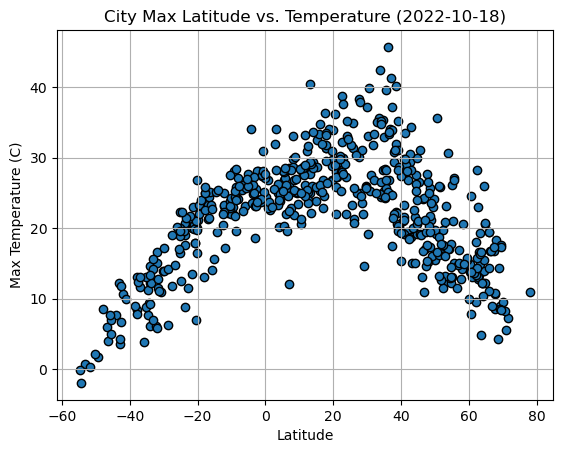

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

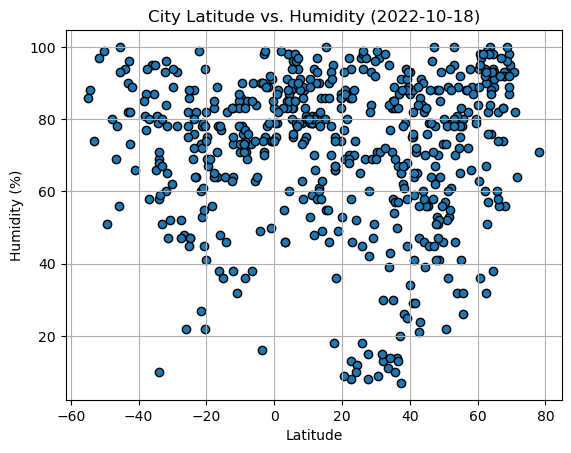

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

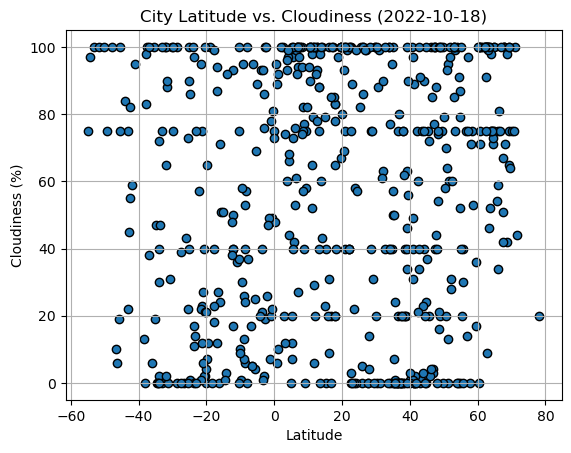

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

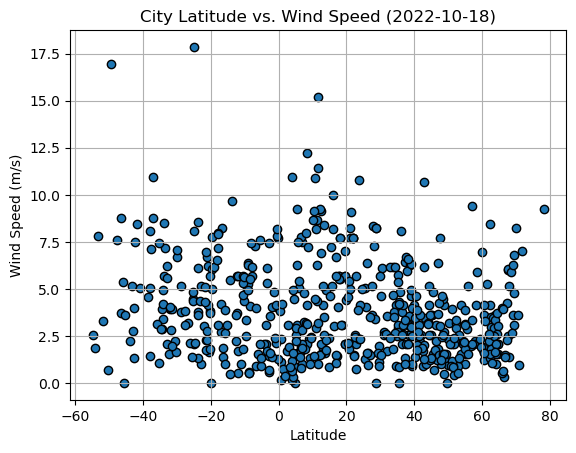

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, line_eqn):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    r = st.pearsonr(x_values, y_values)
    #print(f"The r-value is : {r[0]}")
    regress_values = x_values * slope + intercept
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_values.name}")
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    line_equation = f"y = {slope: .2f}x +{intercept: .2f}"
    plt.annotate(line_equation, line_eqn, fontsize = 12, color = "red")
    print(f"The r-value is: {r[0]}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kelo,9.3086,15.8066,25.02,75,58,1.32,TD,1689889126
1,rongelap,11.1635,166.8941,28.68,81,98,8.16,MH,1689889126
4,qaqortoq,60.7167,-46.0333,7.78,98,100,1.21,GL,1689889083
5,mil'kovo,55.6078,37.7956,15.03,80,30,2.87,RU,1689888856
6,iskateley,67.6803,53.1512,10.72,92,100,5.98,RU,1689889126


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,petauke,-14.2426,31.3253,19.51,46,3,5.48,ZM,1689889126
3,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689888946
11,quellon,-43.1167,-73.6167,12.14,82,75,5.14,CL,1689889127
12,esmeraldas,-19.7625,-44.3139,21.17,75,65,4.99,BR,1689889127
14,edinburgh of the seven seas,-37.0676,-12.3116,11.70,58,38,10.96,SH,1689889127


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5974220946669591


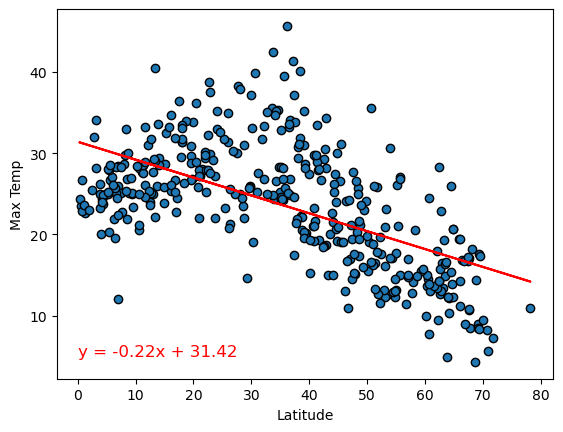

In [15]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(0,5))


The r-value is: 0.8969533867644903


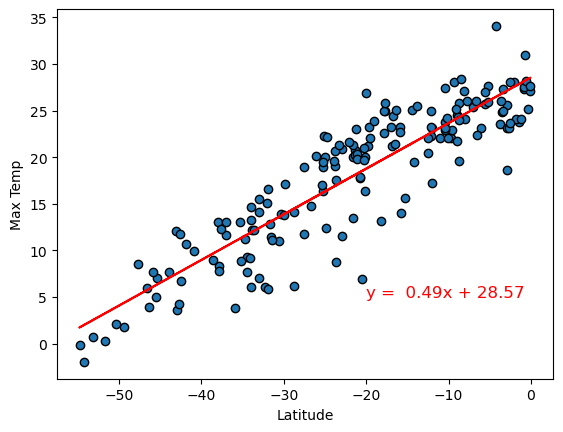

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-20,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0023086963217624074


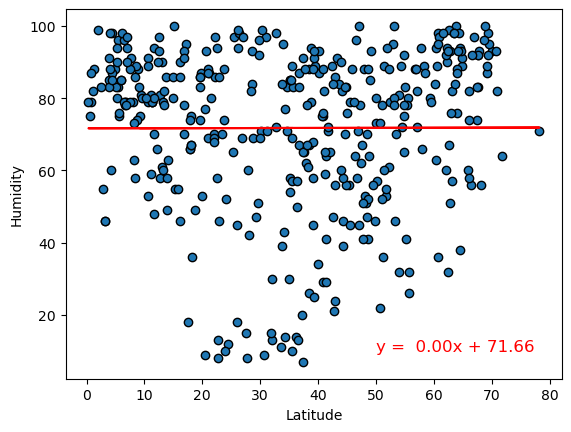

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(50,10))

The r-value is: -0.08027304168346638


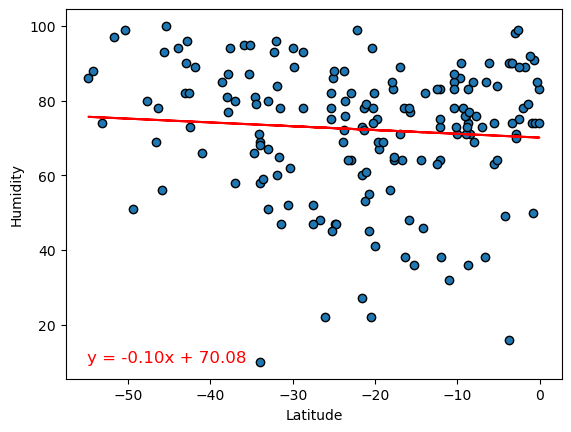

In [18]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],(-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.016162898488358834


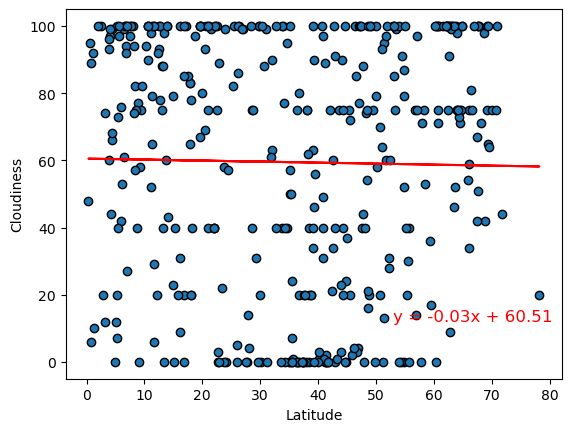

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],(53,12))

The r-value is: -0.1739388008635388


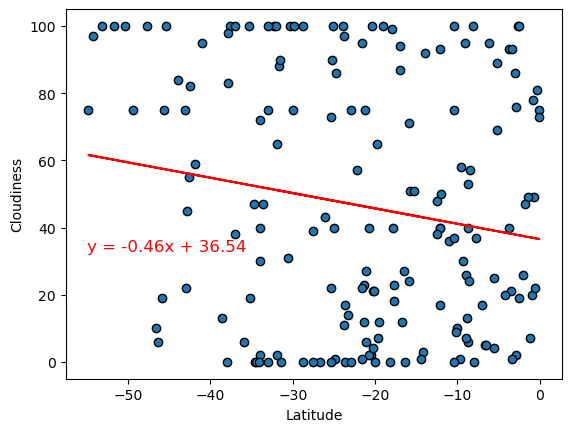

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],(-55,33))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17002984413052025


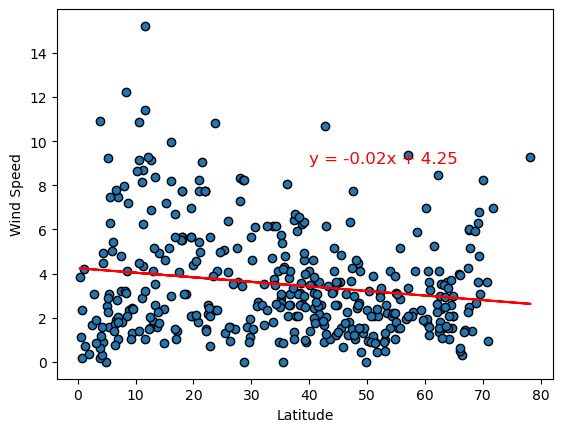

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],(40,9))

The r-value is: -0.155088860889952


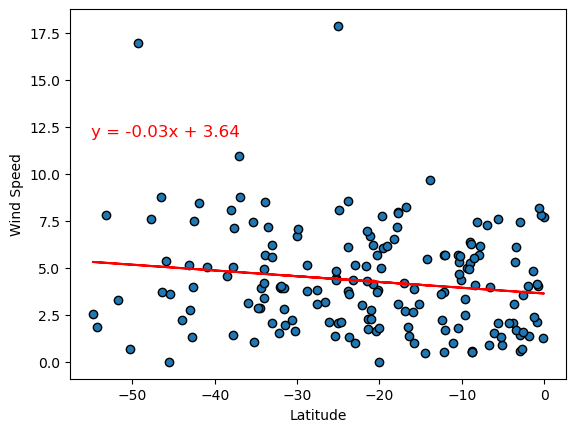

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],(-55,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE